The table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

# Problem description:

The goal is to predict the average price.  

# Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


# Import library

In [402]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV

In [403]:
df=pd.read_csv("Avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [404]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [405]:
df.dropna(inplace=True)

In [406]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [407]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [408]:
df.drop(df.columns[0],axis=1,inplace=True)

Here we have drop unnamed column because which have no effect on dataset

In [409]:
df.shape

(1517, 13)

finally we have 1517 rows and 13 columns

In [410]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

Here we have most of the column in float type and three column have object type. Let's change the date column in to datetime formate

In [411]:
# convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [412]:
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [413]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte,10,16
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte,9,10
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte,2,10
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte,9,25


now change the date column in to datetime formate and we have 2 more column that is month and day. Let's drop date column because already have the data

In [414]:
df.drop('Date',axis=1,inplace=True)

now droped the date column

In [415]:
df.apply(lambda x: len(x.unique()))

AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
Month             12
Day               31
dtype: int64

Here we can see that type and year are the categorical column other are continous type

In [416]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


 
 
1 . Number of rows in each columns are same ,so there is no missing value.

2. Also, mean and std are not that much different so that datas are not that much spreaded.

3. Mean and median also can see the diffrents in almost columns except year and AveragePrice column. so skewness might be present on that columns.

4. By checking the difference between the 75% and max value there are huge different in XLargeBags column. so outlier can present in almost  column.

# Data Visualization:

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

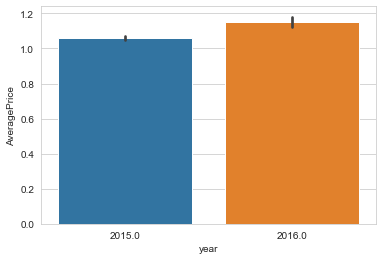

In [417]:
sns.set_style("whitegrid")
sns.barplot(x = 'year',y = 'AveragePrice',data=df)

we can see that the price of avocado per unit in 2016 is higher than the year of 2015. 

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

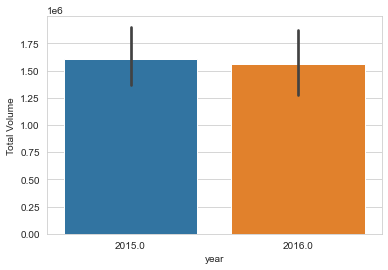

In [418]:
sns.set_style("whitegrid")
sns.barplot(x = 'year',y = 'Total Volume',data=df)

compare between 2015 and 2016 the number of avocado sold in littile higher in 2015, because it might be the reason that the price of the avocado is lesser than 2016.

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

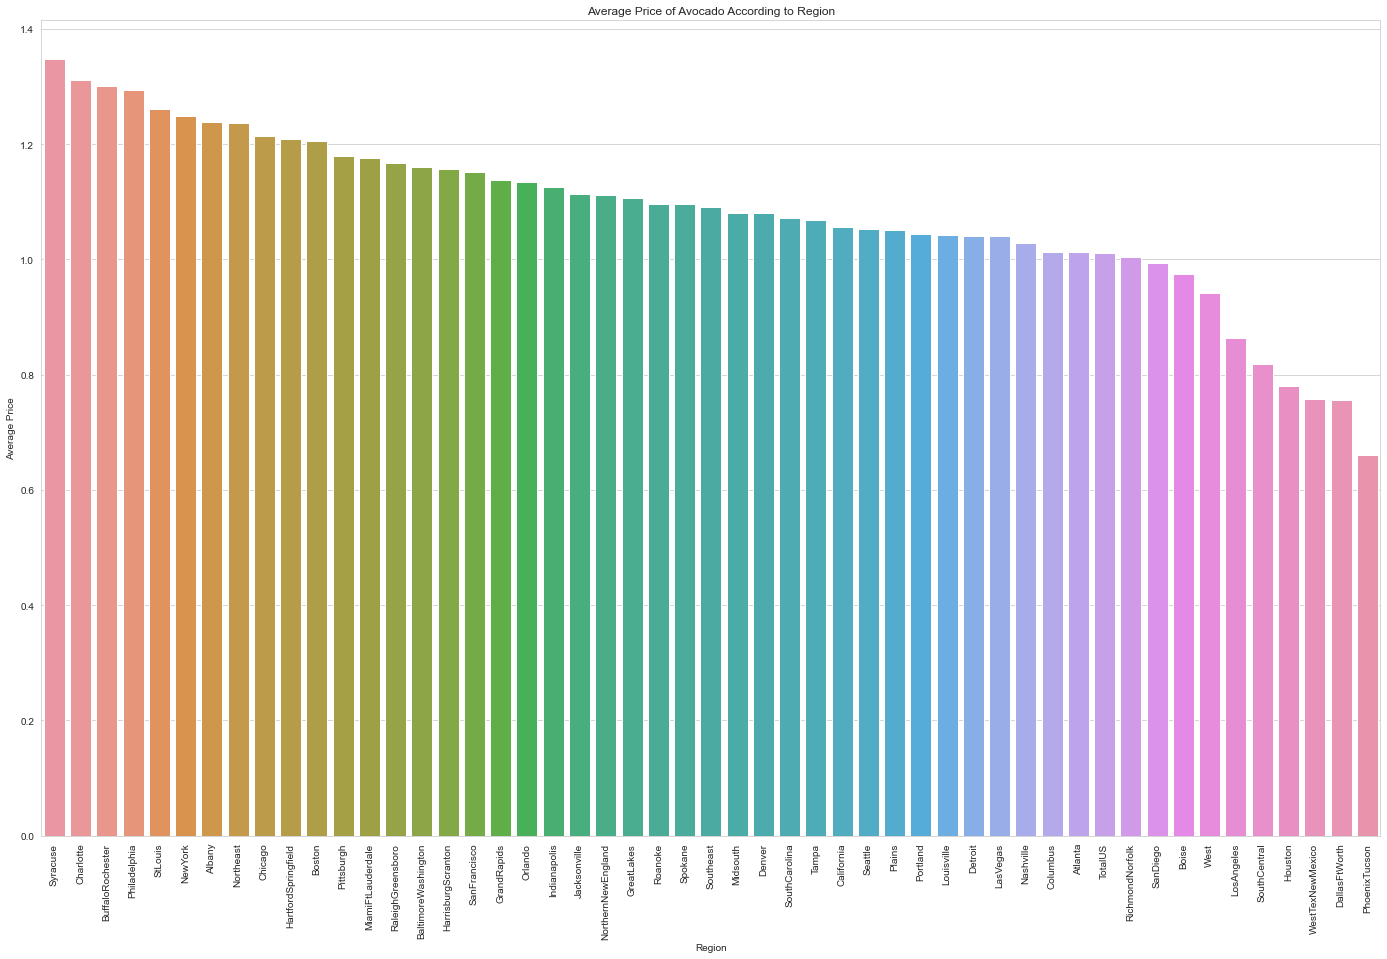

In [419]:
region_list=list(df.region.unique())


average_price=[]
for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)
    

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,15))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Here we can see that highest price region is Syracuse,Charlotte,BuffaloRochester,Philadelphia and SLouis

In [420]:
label=LabelEncoder()
df['region']=label.fit_transform(df['region'])
df['type']=label.fit_transform(df['type'])

In [421]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015.0,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015.0,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015.0,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015.0,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015.0,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016.0,7,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016.0,7,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016.0,7,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016.0,7,9,25


# Outliers

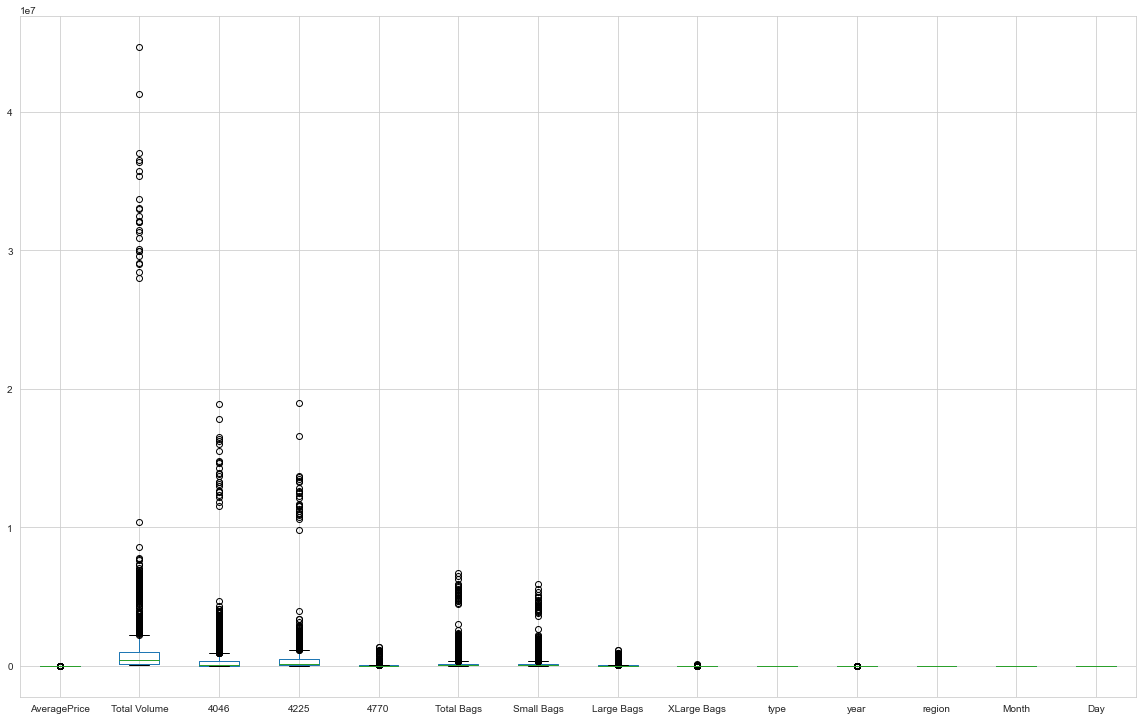

In [422]:
df.boxplot(figsize=(20,15))
plt.subplots_adjust(bottom=0.25)
plt.show()

In columns[Total volume,4046,4225] outlier are very far from the wisker. Other columns also have outliers. Let's check the percentile of after and before removing the outlier

In [423]:
z =np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [424]:
print('shape before removing the outlier:',df.shape)

df_new=df[(z<3).all (axis=1)]#removing the outlier 

print("shape after removing the outlier:",df_new.shape)

shape before removing the outlier: (1517, 14)
shape after removing the outlier: (0, 14)


when we remove the outlier we can lost all the rows so have not remove the outlier.

In [425]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
Month           0.101439
Day             0.041303
dtype: float64

In [426]:
#In column type we have only one attribute so lets drop that column
df.drop('type',axis=1,inplace=True)

In [448]:
skew = ('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for i in skew:
    if df.skew().loc[i]>0.55:
        df[i] = np.log1p(df[i])

Here we are using log1p method to make the skew value near to zero.

In [449]:
df.skew()

AveragePrice   -0.109444
Total Volume    0.544746
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.518376
Small Bags      0.547589
Large Bags     -0.912766
XLarge Bags     0.375426
year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

now it is almost near to zero

In [450]:
skew1 =["Total Volume","Total Bags","Small Bags","Large Bags","XLarge Bags"]
for i in skew1:
    if df.skew().loc[i]>0.5:
        df[i]=np.sqrt(df[i])

In [451]:
df.skew()

AveragePrice   -0.109444
Total Volume    0.484999
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.429128
Small Bags      0.464871
Large Bags     -0.912766
XLarge Bags     0.375426
year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

In [452]:
df.drop("region",axis=1,inplace=True) # drop the region column bcs it not requerd for price prediction

KeyError: "['region'] not found in axis"

<AxesSubplot:>

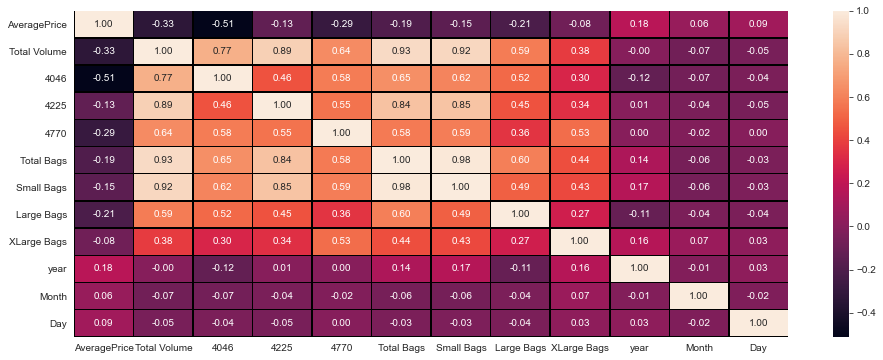

In [453]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True,linewidths = 0.5,linecolor="black",fmt = '.2f')

Here total bags and small bags are highly correlated with each other. And column '4046' is highly negative correlated with label.

# split x and y

In [454]:
x = df.iloc[:,1:13]
y = df["AveragePrice"]

In [455]:
x.shape

(1517, 11)

In [456]:
y.shape

(1517,)

In [457]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [458]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print('r2 score:',r2_score(y_test,pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

r2 score: 0.37027593481737564
MAE: 0.11445892294294027
MSE: 0.022098740439241513
RMSE: 0.14865645105154876


r2 score is 37 and RMSE is low, lets check scatterplot

,Y Test,Pred
724,1.18,1.113543
812,1.25,1.277771
1466,1.08,1.047310
1469,1.07,1.049232
51,1.22,1.283425


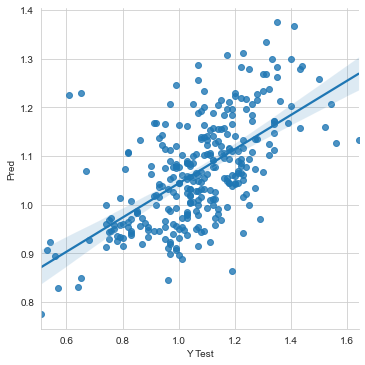

In [459]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

Here we can't say that we have a straight line

In [460]:
fst=RandomForestRegressor()
fst.fit(X_train,y_train)
pred=fst.predict(X_test)
print('r2 score:',r2_score(y_test,pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

r2 score: 0.8119234831853654
MAE: 0.060099013157894746
MSE: 0.006600119572368427
RMSE: 0.08124111996008196


,Y Test,Pred
724,1.18,1.1388
812,1.25,1.2088
1466,1.08,1.1286
1469,1.07,1.1614
51,1.22,1.2624


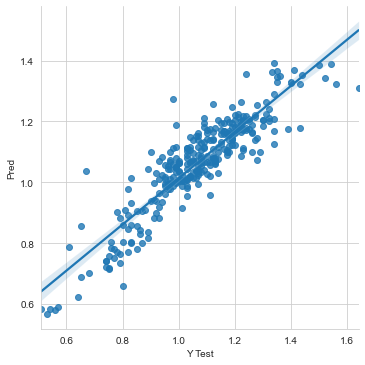

In [461]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

Now it is betterthan previous model ans RMSE is also lower than previous and r2 score also higher

In [462]:
boost=GradientBoostingRegressor()
boost.fit(X_train,y_train)
pred=boost.predict(X_test)
print('r2 score:',r2_score(y_test,pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

r2 score: 0.706785369252876
MAE: 0.0768763305102756
MSE: 0.010289703659315582
RMSE: 0.1014381765378084


This model is not that much perform in good.

Text(0, 0.5, 'Predicted Y')

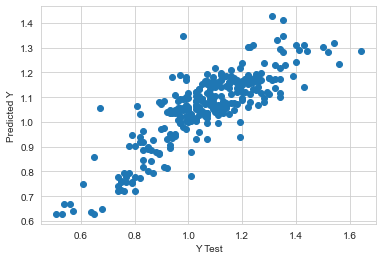

In [463]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Here also not exact line but good

In [464]:
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)
pred=tree.predict(X_test)
print('r2 score:',r2_score(y_test,pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

r2 score: 0.7174497737571629
MAE: 0.07134868421052631
MSE: 0.009915460526315789
RMSE: 0.0995764054699495


,Y Test,Pred
724,1.18,0.91
812,1.25,1.20
1466,1.08,0.99
1469,1.07,1.15
51,1.22,1.26


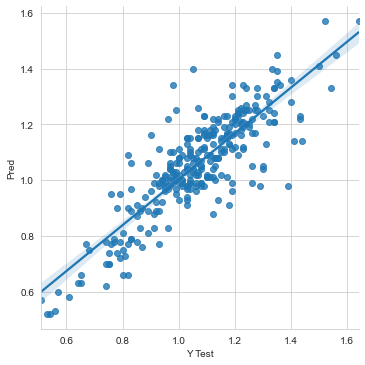

In [465]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

performace of this model also very low.

So performance of the above models RandomForestRegressor is the best but lets try to improve the model prediction

In [466]:
parameter ={'max_depth':np.arange(1,10),
            'max_features':['auto','sqrt','log2']}
gcv=GridSearchCV(RandomForestRegressor(),parameter,cv=3)
gcv.fit(x_train,y_train)
gcv.best_params_

{'max_depth': 1, 'max_features': 'log2'}

In [467]:
fst=RandomForestRegressor(max_depth=1,max_features='log2')
fst.fit(X_train,y_train)
pred=fst.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.12850031641059656
MSE: 0.02702178021444413
RMSE: 0.16438302897332233


--> RandomForestRegressor is the best model 

--> When we check the r2we got 81% and check the lmplot the actual value and predicted value almost close to each other.

--> After tuning the model using GridsearchCV the RMSE value also very less.

# Save

In [468]:
import joblib
joblib.dump(RandomForestRegressor(),"rnf.obj")

['rnf.obj']